In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("preprocessed_file.csv")
data.head(2)

,Time,clean text,Score
0,939340800,witty little book makes son laugh loud recite ...,1
1,1194739200,grew reading sendak books watching really rosi...,1


In [3]:
data.isnull().any().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Time          False
clean text     True
Score         False
dtype: bool>

In [4]:
final_data=data.dropna()

In [5]:
final_data.isnull().any().sum()

0

In [11]:
sample_data=final_data.sample(100000,random_state=42)
print(sample_data.shape)
print(sample_data.columns)

(100000, 3)
Index(['Time', 'clean text', 'Score'], dtype='object')


In [12]:
X=sample_data['clean text']
Y=sample_data["Score"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(70000,) (70000,)
(30000,) (30000,)


### Applying TFIDF

In [13]:
tfidf=TfidfVectorizer()
x_train_tfidf=tfidf.fit_transform(X_train)
print(type(x_train_tfidf))
print(x_train_tfidf.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(70000, 51227)


In [15]:
x_test_tfidf=tfidf.transform(X_test)
print(type(x_test_tfidf))
print(x_test_tfidf.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(30000, 51227)


In [21]:
s=StandardScaler(with_mean=False)
X_train_stand=s.fit_transform(x_train_tfidf)
X_test_stand=s.transform(x_test_tfidf)


The optimal number of neighbors is 5.


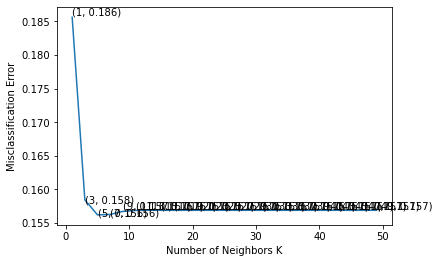

the misclassification error for each k value is :  [0.186 0.158 0.156 0.156 0.157 0.157 0.157 0.157 0.157 0.157 0.157 0.157
 0.157 0.157 0.157 0.157 0.157 0.157 0.157 0.157 0.157 0.157 0.157 0.157
 0.157]


In [25]:
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_stand, Y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [29]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
# fitting the model
knn_optimal.fit(X_train_stand, Y_train)
# predict the response
pred = knn_optimal.predict(X_test_stand)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 5 is 84.516667%


In [30]:
confusion_matrix(Y_test,pred)

array([[  191,  4515],
       [  130, 25164]], dtype=int64)